In [2]:

import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import time
import datetime
import threading
import os
import concurrent.futures
from numba import njit

In [2]:
directory_path = 'C:/Users/myrcene/Documents/qwantss/Longest Holdings Corporation/enigma/ohlc/1m'

# Initialize a list to store the first two characters
tickers = []

# Store the first two characters of each file name in the list
for filename in os.listdir(directory_path):
    if os.path.isfile(os.path.join(directory_path, filename)):
        tickers.append(filename[:2])

# tickers now contains the first two characters of each file name
print(tickers)

['6C', '6E', '6S', 'CL', 'ES', 'GC', 'HG', 'HO', 'NG', 'NQ', 'RB', 'RT', 'SI', 'UB', 'YM', 'ZB', 'ZC', 'ZF', 'ZL', 'ZM', 'ZN', 'ZS', 'ZW']


In [3]:
timefr = ['1m', '1h', '1d']
columns_to_remove = ['rtype', 'publisher_id', 'instrument_id']

# Initialize a dictionary to store dataframes
dataframes = {}

for ticker in tickers:
    for time in timefr:
        filename = f'{ticker}.c.0_{time}.csv'
        filepath = f'C:/Users/myrcene/Documents/qwantss/Longest Holdings Corporation/enigma/ohlc/{time}/{filename}'  # Update with your file path
        df_name = f'{ticker}{time}'  # Create a unique name for the dataframe
        df = pd.read_csv(filepath, index_col=0)
        
        # Drop specified columns
        df = df.drop(columns=columns_to_remove, errors='ignore')
        
        # Set 'symbol' as the index
        df.set_index('symbol', inplace=True)
        
        dataframes[df_name] = df


In [4]:
es1h = dataframes['ES1h']
nq1h = dataframes['NQ1h']
zn1h = dataframes['ZN1h']
zf1h = dataframes['ZF1h']
gc1h = dataframes['GC1h']
swiss1h = dataframes['6S1h']
can1h = dataframes['6C1h']
euro1h = dataframes['6E1h']
cl1h = dataframes['CL1h']
hg1h = dataframes['HG1h']
ho1h = dataframes['HO1h']
ng1h = dataframes['NG1h']
rb1h = dataframes['RB1h']
rt1h = dataframes['RT1h']
si1h = dataframes['SI1h']
ub1h = dataframes['UB1h']
ym1h = dataframes['YM1h']
zb1h = dataframes['ZB1h']
zc1h = dataframes['ZC1h']
zf1h = dataframes['ZF1h']
zl1h = dataframes['ZL1h']
zm1h = dataframes['ZM1h']
zn1h = dataframes['ZN1h']
zs1h = dataframes['ZS1h']
zw1h = dataframes['ZW1h']


In [5]:
dataframes_aligned = {k: df.drop(columns=columns_to_remove, errors='ignore').reset_index(drop=True) for k, df in dataframes.items()}


In [6]:
# Resetting the index for each DataFrame before concatenation
for df_name in dataframes:
    dataframes[df_name] = dataframes[df_name].reset_index(drop=True)

# Now attempt to concatenate again
combined_df = pd.concat(dataframes.values(), axis=1)

# Renaming the columns for clarity
combined_df.columns = [f"{df_name}_{col}" for df_name, df in dataframes.items() for col in df.columns]



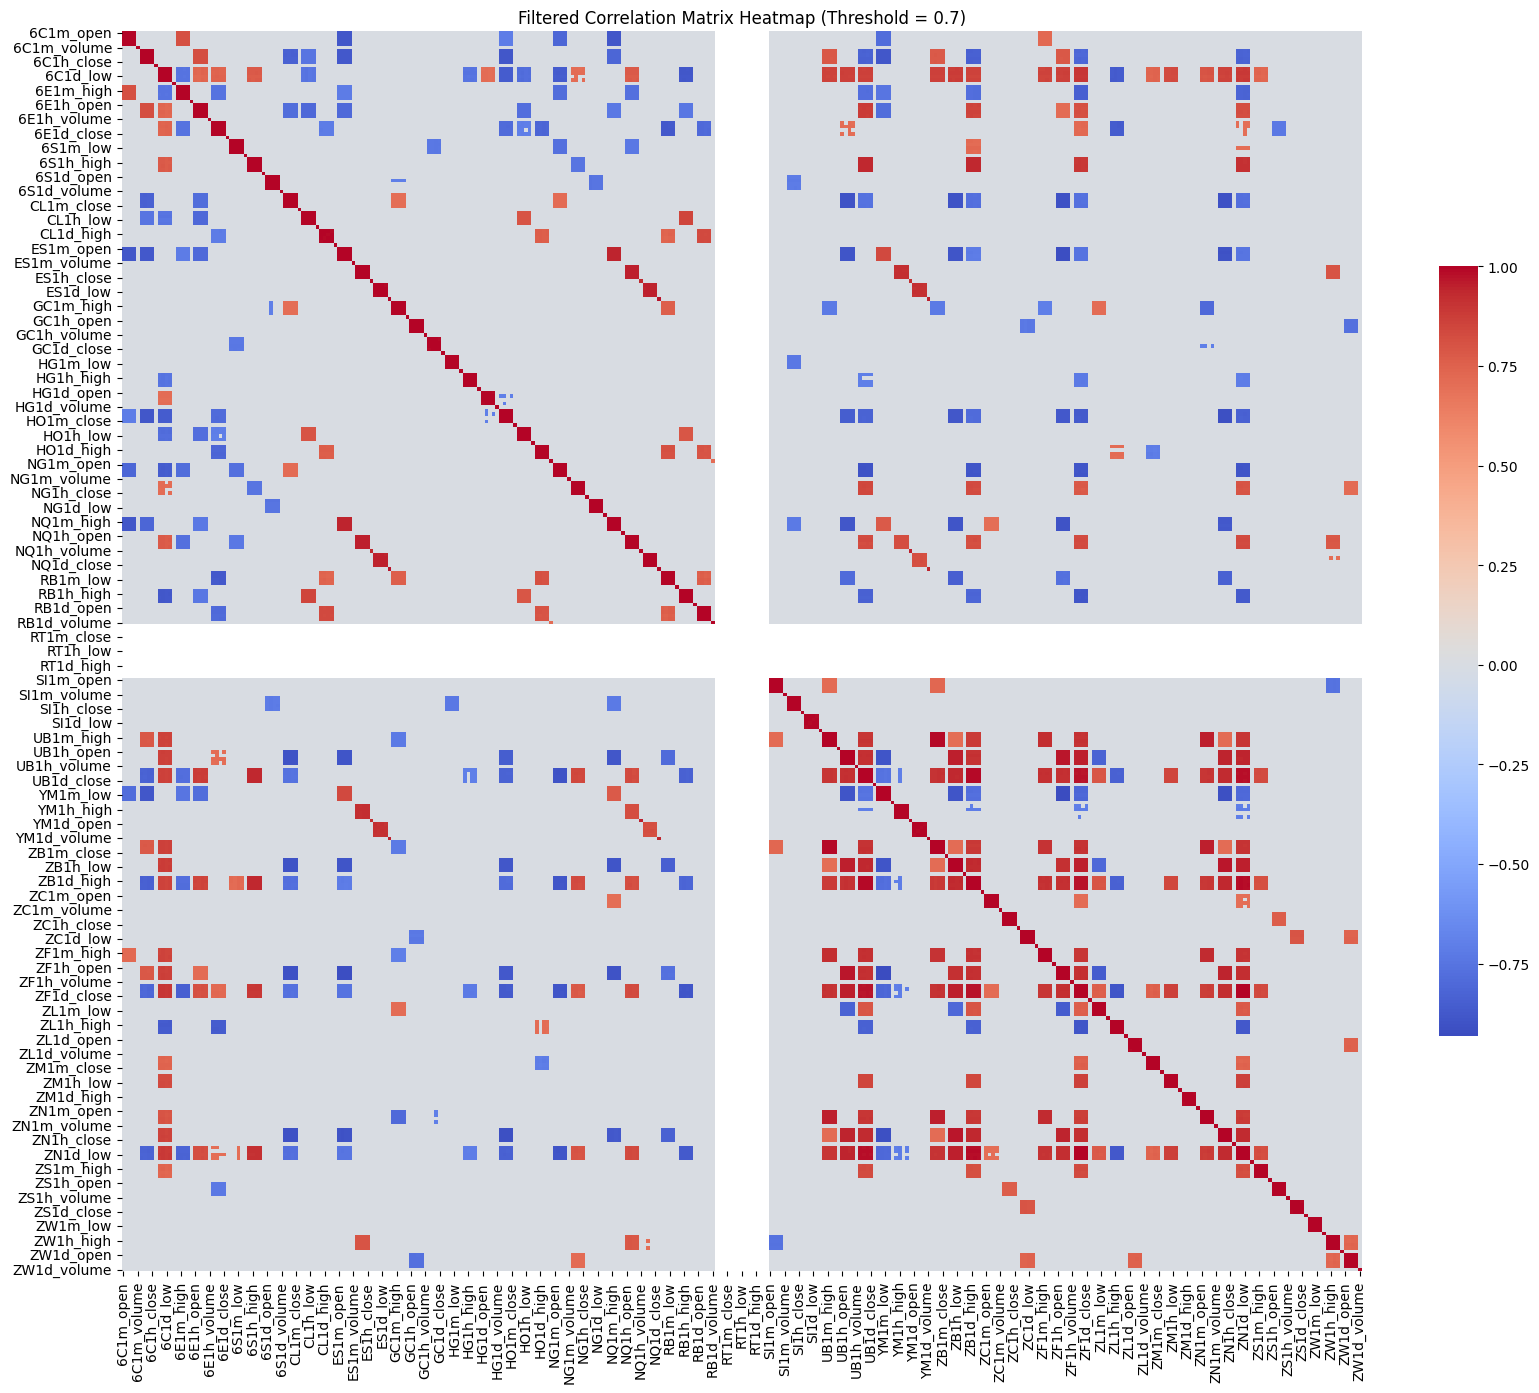

In [7]:

for df_name in dataframes:
    dataframes[df_name] = dataframes[df_name].reset_index(drop=True)
combined_df = pd.concat(dataframes.values(), axis=1)
combined_df.columns = [f"{df_name}_{col}" for df_name, df in dataframes.items() for col in df.columns]
corr_matrix = combined_df.corr()
keep_mask = (corr_matrix.abs() >= 0.5)
keep_columns = keep_mask.any(axis=0)
filtered_df = combined_df.loc[:, keep_columns]

# Set a threshold for correlation values
threshold = 0.7  # You can adjust this threshold as needed

mask_filtered = np.abs(corr_matrix) > threshold

plt.figure(figsize=(20, 20))  # Adjust the size as necessary
sbn.heatmap(corr_matrix * mask_filtered, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title(f'Filtered Correlation Matrix Heatmap (Threshold = {threshold})')
plt.show()



Dollar up, assets down, dollar down, assets up.


In [29]:
nq1hrecent1000 = nq1h.iloc[-1000:]

In [30]:
estick = pd.read_csv('ES.c.0_2021_2022_trades.csv')

In [31]:
estick2 = estick

In [38]:
estick = estick2

In [42]:
estick

,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,symbol
0,2021-02-02 00:00:00.003074319,0,1,5482,T,A,0,3769.75,1,0,23056,12357319,ES.c.0
1,2021-02-02 00:00:00.003169313,0,1,5482,T,A,0,3769.75,2,0,18852,12357320,ES.c.0
2,2021-02-02 00:00:00.003450401,0,1,5482,T,A,0,3769.75,1,0,23265,12357322,ES.c.0
3,2021-02-02 00:00:00.003778019,0,1,5482,T,B,0,3769.75,1,0,18754,12357341,ES.c.0
4,2021-02-02 00:00:00.103003547,0,1,5482,T,A,0,3769.75,1,0,18154,12357417,ES.c.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81908569,2022-02-01 23:59:55.119198487,0,1,5782,T,B,0,4551.00,1,0,20504,24095467,ES.c.0
81908570,2022-02-01 23:59:55.551599947,0,1,5782,T,B,0,4551.00,1,0,20591,24095475,ES.c.0
81908571,2022-02-01 23:59:56.530922297,0,1,5782,T,B,0,4551.25,4,0,18489,24095535,ES.c.0
81908572,2022-02-01 23:59:56.531183265,0,1,5782,T,B,0,4551.25,1,0,18312,24095537,ES.c.0


In [43]:
# Filter out rows where the length of 'ts_event' strings is greater than 16
# estick = estick[estick['ts_event'].str.len() <= 6]

# Convert 'ts_event' column to datetime with milliseconds unit and handle errors
estick['ts_event'] = pd.to_datetime(estick['ts_event'], errors='coerce')

# Drop rows with NaT (Not a Time) if there are any conversion errors
estick.dropna(subset=['ts_event'], inplace=True)

# Remove current index
estick.reset_index(drop=True, inplace=True)

# Set 'ts_event' column as the datetime index
estick.set_index('ts_event', inplace=True)

# Convert datetime index to UTC timezone if it's not already
estick.index = estick.index.tz_localize('UTC')

# Convert datetime index to New York timezone
estick.index = estick.index.tz_convert('America/New_York')


In [45]:
# Drop columns 'rtype', 'publisher_id', and 'instrument_id'
estick.drop(columns=['rtype', 'publisher_id', 'instrument_id'], inplace=True)


In [50]:
estick

,action,side,depth,price,size,flags,ts_in_delta,sequence,symbol
ts_event,,,,,,,,,
2021-02-01 19:00:00.003074319-05:00,T,A,0,3769.75,1,0,23056,12357319,ES.c.0
2021-02-01 19:00:00.003169313-05:00,T,A,0,3769.75,2,0,18852,12357320,ES.c.0
2021-02-01 19:00:00.003450401-05:00,T,A,0,3769.75,1,0,23265,12357322,ES.c.0
2021-02-01 19:00:00.003778019-05:00,T,B,0,3769.75,1,0,18754,12357341,ES.c.0
2021-02-01 19:00:00.103003547-05:00,T,A,0,3769.75,1,0,18154,12357417,ES.c.0
...,...,...,...,...,...,...,...,...,...
2022-02-01 18:59:55.119198487-05:00,T,B,0,4551.00,1,0,20504,24095467,ES.c.0
2022-02-01 18:59:55.551599947-05:00,T,B,0,4551.00,1,0,20591,24095475,ES.c.0
2022-02-01 18:59:56.530922297-05:00,T,B,0,4551.25,4,0,18489,24095535,ES.c.0


In [51]:
import pandas as pd
import threading

# Assuming estick is your DataFrame containing the data
estick = estick

# Define the resampling intervals
tfresample = ['3', '10', '15', '30', '60', '240', '480']

# Define a function to perform resampling and save to CSV
def resample_and_save(interval):
    trades_data = (estick
                   .groupby(["symbol"])
                   .resample(f'{interval}T')["price"].ohlc())
    trades_data.to_csv(f'estick_{interval}m.csv', index=True)

# Create and start a thread for each resampling interval
threads = []
for interval in tfresample:
    thread = threading.Thread(target=resample_and_save, args=(interval,))
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

print("Resampling complete.")


C:\Users\myrcene\AppData\Local\Temp\ipykernel_55524\236209735.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  trades_data = (estick
Exception in thread Thread-11:
Traceback (most recent call last):
  File "C:\Users\myrcene\anaconda3\envs\teamko\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\myrcene\Documents\qwantss\Longest Holdings Corporation\enigma\ict\lib\site-packages\ipykernel\ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\myrcene\anaconda3\envs\teamko\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\myrcene\AppData\Local\Temp\ipykernel_55524\236209735.py", line 12, in resample_and_save
  File "c:\Users\myrcene\Documents\qwantss\Longest Holdings Corporation\enigma\ict\lib\site-packages\pandas\core\groupby\groupby.py", line 3723, in resample
    return get_resampler_for_grouping(  # type: ignore[mi

Resampling complete.


In [53]:
# Finally, we can resample the data at a fixed one minute interval
trades_data_3m = (
    estick
    .groupby(["symbol"])
    .resample("15min")["price"].ohlc()
).to_csv('estick15min.csv', index=True)

# The Ghost in the machine

# Overview

Abstract: explaining overview of what we doing here, cadence and tone like the abstract in bitcoins whitepaper

This section provides an overview of the project and explains the purpose and goals. The abstract sets the cadence and tone, similar to the abstract in Bitcoin's whitepaper.

## Heading 2

- candlestick open and close % movements
- List item 2
- List item 3


## Time

- Time of day impact price
- day of week impact price
- day of week effect high or low of price


## FVG

- sibi bisi areas how much of the fvg area does price go into usually and for how long
- 
- List item 3


## MLAI

- predicting upcoming fvg's 
- predicting if price will go to fvg 
- which fvg it will draw to 
- will it fail or hold
- List item 2
- List item 3

You can also add links, images, and other elements using Markdown syntax.

![Jupyter Notebook Logo](https://jupyter.org/assets/main-logo.svg)


What can we test or find out?


### SMT

In [87]:
estick15min = pd.read_csv('estick15min.csv')
estick5min = pd.read_csv('estick5min.csv')
estick30min = pd.read_csv('estick_30m.csv')
estick60min = pd.read_csv('estick_60m.csv')
estick240min = pd.read_csv('estick_240m.csv')
estick1m = pd.read_csv('estick1m.csv')

In [88]:
data = estick15min

In [89]:
# Set 'ts_event' column as the datetime index
data.set_index('ts_event', inplace=True)


# Drop the 'symbol' column
data.drop(columns=['symbol'], inplace=True)

# Display the DataFrame with the changes
print(data)


                              open     high      low    close
ts_event                                                     
2021-02-01 19:00:00-05:00  3769.75  3770.00  3760.25  3761.75
2021-02-01 19:15:00-05:00  3761.50  3765.25  3760.00  3761.75
2021-02-01 19:30:00-05:00  3761.50  3767.25  3760.00  3766.50
2021-02-01 19:45:00-05:00  3766.50  3767.25  3763.75  3767.25
2021-02-01 20:00:00-05:00  3767.25  3773.25  3766.25  3772.75
...                            ...      ...      ...      ...
2022-02-01 17:45:00-05:00      NaN      NaN      NaN      NaN
2022-02-01 18:00:00-05:00  4552.00  4552.25  4547.00  4548.75
2022-02-01 18:15:00-05:00  4548.75  4552.25  4548.50  4551.75
2022-02-01 18:30:00-05:00  4551.75  4552.25  4548.50  4552.25
2022-02-01 18:45:00-05:00  4552.00  4552.00  4549.75  4551.25

[35040 rows x 4 columns]


In [92]:
def process_and_update_csv(file_path):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    
    # Convert 'ts_event' to datetime and set as index
    data['ts_event'] = pd.to_datetime(data['ts_event'])
    data.set_index('ts_event', inplace=True)
    
    # Drop the 'symbol' column if it exists
    if 'symbol' in data.columns:
        data.drop(columns=['symbol'], inplace=True)
    
    # Save the updated DataFrame back to the CSV
    data.to_csv(file_path)

file_paths = [
    'estick15min.csv',
    'estick5min.csv',
    'estick_30m.csv',
    'estick_60m.csv',
    'estick_240m.csv',
    'estick1m.csv'
]

for file_path in file_paths:
    process_and_update_csv(file_path)


START HERE


In [7]:
es15 = pd.read_csv('estick15min.csv')
es5 = pd.read_csv('estick5min.csv')
es30 = pd.read_csv('estick_30m.csv')
es60 = pd.read_csv('estick_60m.csv')
es240 = pd.read_csv('estick_240m.csv')
es1 = pd.read_csv('estick1m.csv')

In [5]:
data = es1

In [6]:
class ICT:
    def __init__(self, data):
        self.data = data
        self.data.reset_index(drop=True, inplace=True)

    def pump(self):
        movement = ((self.data['close'] - self.data['open']) / self.data['open']) * 100
        self.data['pump_move'] = movement
        return movement > 0

    def dump(self):
        movement = ((self.data['open'] - self.data['close']) / self.data['open']) * 100
        self.data['dump_move'] = movement
        return movement > 0

    def shigh(self):
        condition = self.shigh_condition()
        self.data['shigh_price'] = self.data['high'][condition]
        return condition

    def slow(self):
        condition = self.slow_condition()
        self.data['slow_price'] = self.data['low'][condition]
        return condition

    def bisob(self):
        condition = self.slow_condition()
        self.data['bisob_open'] = self.data['open'].shift(1)[condition]
        return condition

    def sibob(self):
        condition = self.shigh_condition()
        self.data['sibob_open'] = self.data['open'].shift(1)[condition]
        return condition

    def bisi(self):
        bisi_indices = ICT.calculate_bisi_njit(self.data['low'].to_numpy(), self.data['high'].to_numpy())
        bisi_series = pd.Series(False, index=self.data.index)
        bisi_series.iloc[bisi_indices] = True
        self.data['bisi_high'] = self.data['high'][bisi_series]
        self.data['bisi_low'] = self.data['low'][bisi_series]
        return bisi_series

    def sibi(self):
        sibi_indices = ICT.calculate_sibi_njit(self.data['low'].to_numpy(), self.data['high'].to_numpy())
        sibi_series = pd.Series(False, index=self.data.index)
        sibi_series.iloc[sibi_indices] = True
        self.data['sibi_low'] = self.data['low'][sibi_series]
        self.data['sibi_high'] = self.data['high'][sibi_series]
        return sibi_series

    @staticmethod
    @njit
    def calculate_bisi_njit(low, high):
        bisi_indices = []
        for i in range(1, len(low) - 1):
            if high[i - 1] < low[i + 1]:
                bisi_indices.append(i)
        return np.array(bisi_indices)

    def calculate_bisi(self):
        low = self.data['low'].to_numpy()
        high = self.data['high'].to_numpy()
        bisi_indices = ICT.calculate_bisi_njit(low, high)

        # Create a Boolean series with the same length as the DataFrame
        bisi_series = pd.Series(False, index=self.data.index)
        bisi_series.iloc[bisi_indices] = True
        return bisi_series

    @staticmethod
    @njit
    def calculate_sibi_njit(low, high):
        sibi_indices = []
        for i in range(1, len(low) - 1):
            if low[i - 1] > high[i + 1]:
                sibi_indices.append(i)
        return np.array(sibi_indices)

    def calculate_sibi(self):
        low = self.data['low'].to_numpy()
        high = self.data['high'].to_numpy()
        sibi_indices = ICT.calculate_sibi_njit(low, high)

        # Create a Boolean series with the same length as the DataFrame
        sibi_series = pd.Series(False, index=self.data.index)
        sibi_series.iloc[sibi_indices] = True
        return sibi_series

    # Helper methods for conditions
    def shigh_condition(self):
        high_shifted_minus_1 = self.data['high'].shift(-1)
        high_shifted_plus_1 = self.data['high'].shift(1)
        return (self.data['high'] > high_shifted_minus_1) & (self.data['high'] > high_shifted_plus_1)

    def slow_condition(self):
        low_shifted_minus_1 = self.data['low'].shift(-1)
        low_shifted_plus_1 = self.data['low'].shift(1)
        return (self.data['low'] < low_shifted_minus_1) & (self.data['low'] < low_shifted_plus_1)


,ts_event,open,high,low,close,pump_move,dump_move,shigh_price,slow_price,bisob_open,sibob_open,bisi_high,bisi_low,sibi_low,sibi_high
0,2021-02-01 19:00:00-05:00,3769.75,3770.00,3767.75,3768.25,-0.039790,0.039790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 19:01:00-05:00,3768.00,3769.25,3767.25,3768.00,0.000000,0.000000,NaN,3767.25,3769.75,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 19:02:00-05:00,3768.00,3768.50,3767.50,3768.25,0.006635,-0.006635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 19:03:00-05:00,3768.25,3768.50,3767.00,3768.00,-0.006634,0.006634,NaN,3767.00,3768.00,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 19:04:00-05:00,3768.00,3768.00,3767.25,3767.50,-0.013270,0.013270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Example of usage
ict = ICT(data)
ict.pump()
ict.dump()
ict.shigh()
ict.slow()
ict.bisob()
ict.sibob()
ict.bisi()
ict.sibi()

# Now, the DataFrame 'data' will have new columns with the specific values for each pattern
ict.data.head()

In [63]:
# Check if all values in the 'action' column are equal to 'T'
if (estick15min['shigh_price'] == 'Nan').all():
    print("All values in the 'action' column are 'T'.")
else:
    print("Not all values in the 'action' column are 'T'.")

Not all values in the 'action' column are 'T'.


In [28]:
from numba import njit
import numpy as np

# Assuming `shigh_condition` and `slow_condition` are methods that return boolean arrays indicating swing highs and lows

class ICTBreakerModel:
    def __init__(self, data):
        self.data = data

    @staticmethod
    @njit
    def detect_breaker(low, high, shigh_indices, slow_indices):
        breakers = np.zeros_like(low, dtype=np.int32)  # Initialize breaker flags
        for i in range(len(low)):
            if i in shigh_indices and i+1 in slow_indices:
                for j in range(i+2, len(low)):
                    if low[j] < low[i+1] and high[j] > high[i]:
                        breakers[j] = 1
                        break  # Found a potential breaker, move to the next sequence
        return breakers

    def apply_breaker_model(self):
        # Convert conditions to indices
        shigh_indices = np.where(self.data['shigh_price'].notna())[0]
        slow_indices = np.where(self.data['slow_price'].notna())[0]
        
        # Detect breakers
        breaker_flags = ICTBreakerModel.detect_breaker(self.data['low'].values, self.data['high'].values, shigh_indices, slow_indices)
        
        # Apply breaker flags to the DataFrame
        self.data['potential_breaker'] = breaker_flags
        
        return self.data

# Example usage:
# ict_model = ICTBreakerModel(ict.data)
# breaker_data = ict_model.apply_breaker_model()
# print(breaker_data[['low', 'high', 'shigh_price', 'slow_price', 'potential_breaker']])


In [17]:
class ICTEntryModels:
    def __init__(self, data):
        self.data = data

    def breaker_model(self):
        # Implement the breaker model logic here
        pass

    def model_2022(self):
        # Implement the 2022 model logic here
        pass

# Usage example
ict = ICT(data)
# Assuming `ict.data` is the DataFrame updated by `ICT` methods
ict_models = ICTEntryModels(ict.data)
ict_models.breaker_model()
ict_models.model_2022()


In [ ]:
bisi = [
    ((df['high'].shift(-2) > df['low'].shift(-1)) & (df['high'].shift(-1) < df['low'])),
]

In [40]:
result_s

,publisher_id,instrument_id,open,high,low,close,volume,symbol,BISI,SIBI
17654,1.0,17077.0,4913.00,4916.50,4909.50,4913.50,95844.0,ES.c.0,False,False
17655,1.0,17077.0,4913.50,4929.75,4895.50,4904.25,398743.0,ES.c.0,False,True
17656,1.0,17077.0,4904.25,4905.50,4868.25,4868.75,600796.0,ES.c.0,False,True
17657,1.0,17077.0,4868.75,4876.00,4866.00,4871.75,108429.0,ES.c.0,False,False
17658,1.0,17077.0,4874.50,4877.50,4872.50,4876.75,10442.0,ES.c.0,True,False
17659,1.0,17077.0,4876.75,4883.00,4876.50,4879.50,10305.0,ES.c.0,True,False
17660,1.0,17077.0,4879.50,4881.25,4878.00,4880.75,8033.0,ES.c.0,False,False
17661,1.0,17077.0,4880.75,4886.00,4880.25,4884.50,8263.0,ES.c.0,False,False
17662,1.0,17077.0,4884.50,4884.75,4879.50,4882.75,5564.0,ES.c.0,False,False
17663,1.0,17077.0,4882.75,4885.50,4882.75,4884.50,4419.0,ES.c.0,False,False


In [ ]:
# Finally, we can resample the data at a fixed one minute interval
trades_data_1m = (
    trades_data
    .groupby(["symbol"])
    .resample("1T")["price"].ohlc()
)
print(trades_data_1m)